In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import process_location
import imp
from datetime import datetime, timedelta
imp.reload(process_location)
%matplotlib inline

In [235]:
folder = '/Users/alexandreattia/Desktop/Work/Practice/LocationHistory/LocationHistoryData/'
cookie_content = 'gsScrollPos=; _ga=GA1.1.499376354.1458118162; OGPC=732465152-21:699960320-14:448059392-45:527891456-115:904765440-5:979538944-3:; NID=101=tqyY6EIuMfyPA_4R8lQoBi1J4xRqgqtys7_LYTxMcGmJ-uH2kl6snZzvhppOGQWdVP9-f8_PnIQRhCuvSQcKAgwiuNnSveBzJn9MIO3vWYRA6QCJl3rFlw8_zXgCClR0G15QPaY1HX_peTq5OhyUcBge0c0sIKIneXRTy7OLsZq4dt3Sy9wSoHNg52PB7-nqTnDm4071yVAOlm2sWBLRTntEHT6gkuGPzL5qwlMHXYgAda6myU5Vw8sjUms01KtkvNv15JEY24F86h3tPcKbxXZqFnhFLF_-; SID=kgT5WMVhEsccYbfm_yITHcsGXiKUfYY-BPsG26VOh-rmOmZKulU9DQmdNY7vJJmduYXiWQ.; HSID=A9dygpUeleDXWXChh; SSID=AuatJj4wP3vf2PeV3; APISID=ZzMrJRe6AR4eIcz-/AIdBTGY21EnIIMJgz; SAPISID=WEW2s3tyVHa9d0Sn/AZ6_sTv_v54AIVhdv; CONSENT=YES+FR.fr+20150726-13-0; gsScrollPos='
# process_location.create_kml_files('march', 29, 'april', 31, cookie_content, folder)
df = process_location.full_df(folder)

75 KML files (ie 75 days) to concatenate


In [237]:
df_driving = process_location.time_at_doing(df, 'driving')
df_work = process_location.time_at_place(df, 'Work')

For 76 days, I have been driving 4.3 times/day : 5764.1 km in total (79.0 km/days).
On average, each time I am driving is for 27.3 min and 18.2 km.
For 76 days, I have been 49 times at Work for a total of 401.6 hours or 8.2 hours/day


/Users/alexandreattia/Desktop/Work/Practice/LocationHistory/process_location.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df2['DurationMin'] = df2['Duration'].apply(get_sec) / 60


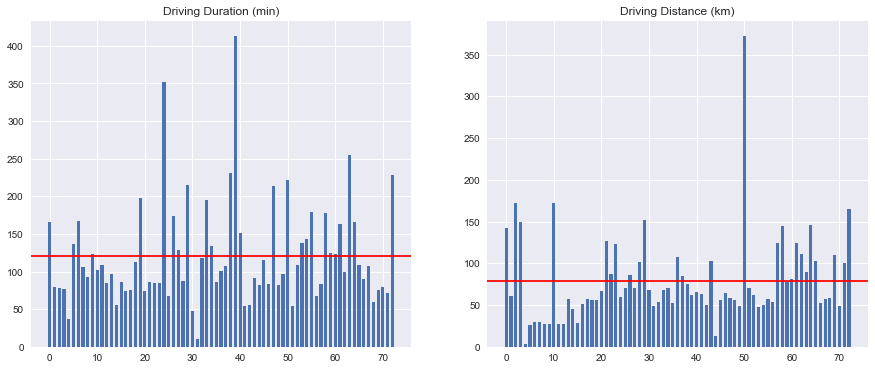

In [21]:
time_per_day = {}
dist_per_day = []
for day in sorted(df_driving['BeginDate'].unique()):
    time_per_day.update({day:df_driving[df_driving['BeginDate'] == day].DurationMin.sum()})
    dist_per_day.append(df_driving[df_driving['BeginDate'] == day].Distance.sum()*0.001)

x = range(len(time_per_day.values()))
width = 1/1.5


f, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].bar(x, list(time_per_day.values()), width)
ax[0].axhline(np.mean(list(time_per_day.values())), color="red")
ax[0].set_title('Driving Duration (min)')

ax[1].bar(x, dist_per_day, width)
ax[1].axhline(np.mean(dist_per_day), color="red")
ax[1].set_title('Driving Distance (km)')

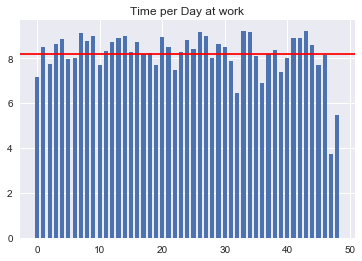

In [32]:
time_per_day = {}
for day in sorted(df_work['BeginDate']):
    time_per_day.update({day:df_work[df_work['BeginDate'] == day].DurationMin.sum() / 60})

x = range(len(time_per_day))
width = 1/1.5
plt.bar(x, time_per_day.values(), width)
plt.axhline(np.mean(list(time_per_day.values())), color="red")
plt.title('Time per Day at work')

In [66]:
a = pd.Series(pd.to_timedelta([elem for elem in df_work.BeginTime if elem < '10:30:00'])).mean().total_seconds()
h,s = divmod(a, 3600)
m,s = divmod(s, 60)
b = pd.Series(pd.to_timedelta([elem for elem in df_work.EndTime if elem > '15:30:00'])).mean().total_seconds()
h1,s1 = divmod(b, 3600)
m1,s1 = divmod(s1, 60)
"On average, I am at work from %02d:%02d:%02d to %02d:%02d:%02d" % (h, m, s, h1, m1, s1)

'On average, I am at work from 09:09:01 to 17:55:41'

In [77]:
process_location.get_sec(df.loc[0, 'BeginTime']), df.loc[0, 'BeginTime']

(86002, '23:53:22')

In [ ]:
## For Machine Learning with a time series, need to convert time to seconds (process_location.get_sec())

In [240]:
import gmplot

In [284]:
date = '2017-03-25'
concatenation = np.concatenate(list(df[df.BeginDate == date].Track))
longitudes, latitudes = [float(elem[0]) for elem in concatenation], [float(elem[1]) for elem in concatenation]

g = gmplot.GoogleMapPlotter(37.428, -122.145, 9)
g.scatter(latitudes, longitudes, 'b')
g.draw('scatter.html')

In [279]:
number_of_days = 30
delta = datetime.strptime(df.loc[0, 'BeginDate'], '%Y-%m-%d') - timedelta(days=number_of_days)
concatenation = np.concatenate(list(df[df.BeginDate > delta.strftime("%Y-%m-%d")].Track))
longitudes, latitudes = [float(elem[0]) for elem in concatenation], [float(elem[1]) for elem in concatenation]

g = gmplot.GoogleMapPlotter(37.428, -122.145, 9)
g.heatmap(latitudes, longitudes)
g.draw('heatmap.html')